<a href="https://colab.research.google.com/github/lee1201zxc/study/blob/main/AI/ML/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PCA클래스가 찾은 주성분의 크기
print(pca.components_.shape)

#주성분 분석(Principal Component Analysis)
특성이 너무 많으면 오버피팅 가능성, 그래서

데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄여(차원을 줄임) 모델 성능 향상 가능(성능은 비슷하나 매우 빠른 시간)

다시 원본 차원으로 복구도 가능, 차원을 줄이니 시각화 편리해짐

주성분 : 데이터의 변동성을 가장 잘 설명하는 축

In [2]:
import numpy as np
import matplotlib.pyplot as plt
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2026-02-10 07:05:48--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2026-02-10 07:05:48--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2026-02-10 07:05:49--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

(50, 10000)


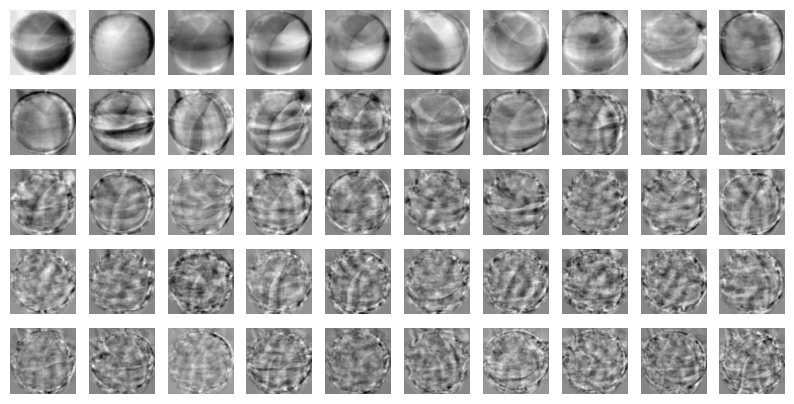

In [4]:
fruits= np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1,100*100)

# PCA, n_componenets->주성분 개수 지정, 비지도 학습이기에 fit에 타깃값 없음
from sklearn.decomposition import PCA
#일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있음, 0.5처럼 소수지정으로 원하는 비율로도 가능 원하는 비율 도달까지 주성분 찾기(늘리기)
pca=PCA(n_components=50)
pca.fit(fruits_2d)

#각 과일 출력 위한 함수
def draw_fruits(arr, ratio=1):
  n=len(arr)
  rows= int(np.ceil(n/10))
  cols= n if rows<2 else 10
  #squeeze=False -> 차원 유지 [1,3]이면 1차원으로 변환될 수도 있음
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j<n:
        axs[i][j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i][j].axis('off')
  plt.show()

#찾은 주성분의 크기 출력
print(pca.components_.shape)
draw_fruits(pca.components_.reshape(-1,100,100))

(300, 10000)
(300, 50)
(300, 10000)


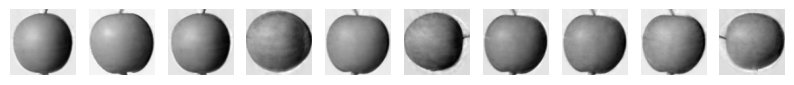

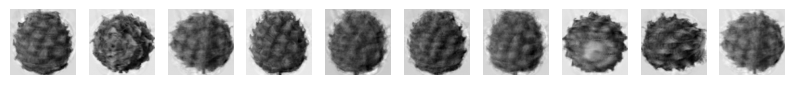

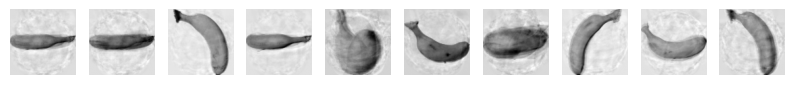



[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578895 0.00511201
 0.00486382 0.00480346 0.00447818 0.00437318 0.0040803  0.00389473
 0.00372439 0.00359279 0.00331464 0.00317817 0.00304312 0.00303675
 0.00288928 0.0027582  0.0026497  0.00255776 0.00251903 0.00247303
 0.00239473 0.00230278 0.00221964 0.0021604  0.00213035 0.00195411
 0.00192929 0.00190348 0.00185145 0.00178739 0.00173343 0.00165837
 0.00161581 0.00155962]
0.9214243018604819
2


In [14]:
# 원본 데이터를 주성분에 투영하여 10000차원을 50차원으로 줄임
print(fruits_2d.shape)
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

# 차원 복구
fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)
#복구한거 다시 이미지화
fruits_reconstruct=fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+10])
  print("\n")
"""
50개 차원이 10000개를 잘 담아냈기에 다시 복구해도 거의 올바른 이미지가 나옴
"""

#설명된 분산(각 주성분이 원본 데이터를 얼마나 잘 나타내는지 분산 값)
#처음 몇 개 주성분이 대부분의 분산을 표현하고 있음
print(pca.explained_variance_ratio_)
# 총 합이 분산 비율
print(np.sum(pca.explained_variance_ratio_))


#주성분 비율로 구하기(50%에 도달할 때까지)
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
# 2개만으로도 50% 달성
print(pca.n_components_)

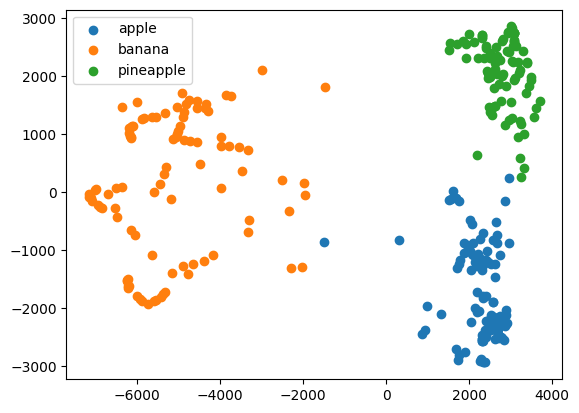

In [17]:
#K평균을 이용한 시각화(주성분 2개로 구분함)
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

for label in range(0,3):
  data=fruits_pca[km.labels_==label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()